# Name - Rohit Singh
# Reg No - 23MCA0163

## ML Project - Classifying the credit card rating as Good or Bad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [2]:
df = pd.read_excel('credit_rating.xls')
df.head()

,S.No,CHK_ACCT,Duration,History,Purpose of credit,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,...,Real Estate,Age,Other installment,Residence,Num_Credits,Job,No. dependents,Phone,Foreign,Credit classification
0,1,0DM,6,critical,radio-tv,1169,unknown,over-seven,4,single-male,...,real-estate,67,none,own,2,skilled,1,no,yes,good.
1,2,less-200DM,48,duly-till-now,radio-tv,5951,less100DM,four-years,2,female-divorced,...,real-estate,22,none,own,1,skilled,1,yes,yes,bad.
2,3,no-account,12,critical,education,2096,less100DM,seven-years,2,single-male,...,real-estate,49,none,own,1,unskilled-resident,2,yes,yes,good.
3,4,0DM,42,duly-till-now,furniture,7882,less100DM,seven-years,2,single-male,...,building-society,45,none,free,1,skilled,2,yes,yes,good.
4,5,0DM,24,delay,new-car,4870,less100DM,four-years,3,single-male,...,none,53,none,free,2,skilled,2,yes,yes,bad.


In [3]:
df.drop(columns = ['S.No', 'S.No.'], inplace = True)

In [4]:
# label encoding
object_cols = ['CHK_ACCT', 'History', 'Purpose of credit', 'Balance in Savings A/C', 'Employment', 'Marital status',
              'Co-applicant', 'Real Estate', 'Other installment', 'Residence', 'Job', 'Phone', 'Foreign', 'Credit classification']

label_encoder = LabelEncoder()

for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [5]:
df.head()

,CHK_ACCT,Duration,History,Purpose of credit,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,Co-applicant,...,Real Estate,Age,Other installment,Residence,Num_Credits,Job,No. dependents,Phone,Foreign,Credit classification
0,0,6,2,6,1169,4,2,4,3,2,...,3,67,1,1,2,1,1,0,1,1
1,1,48,4,6,5951,1,0,2,0,2,...,3,22,1,1,1,1,1,1,1,0
2,2,12,2,2,2096,1,3,2,3,2,...,3,49,1,1,1,3,2,1,1,1
3,0,42,4,3,7882,1,3,2,3,1,...,0,45,1,0,1,1,2,1,1,1
4,0,24,3,4,4870,1,0,3,3,2,...,2,53,1,0,2,1,2,1,1,0


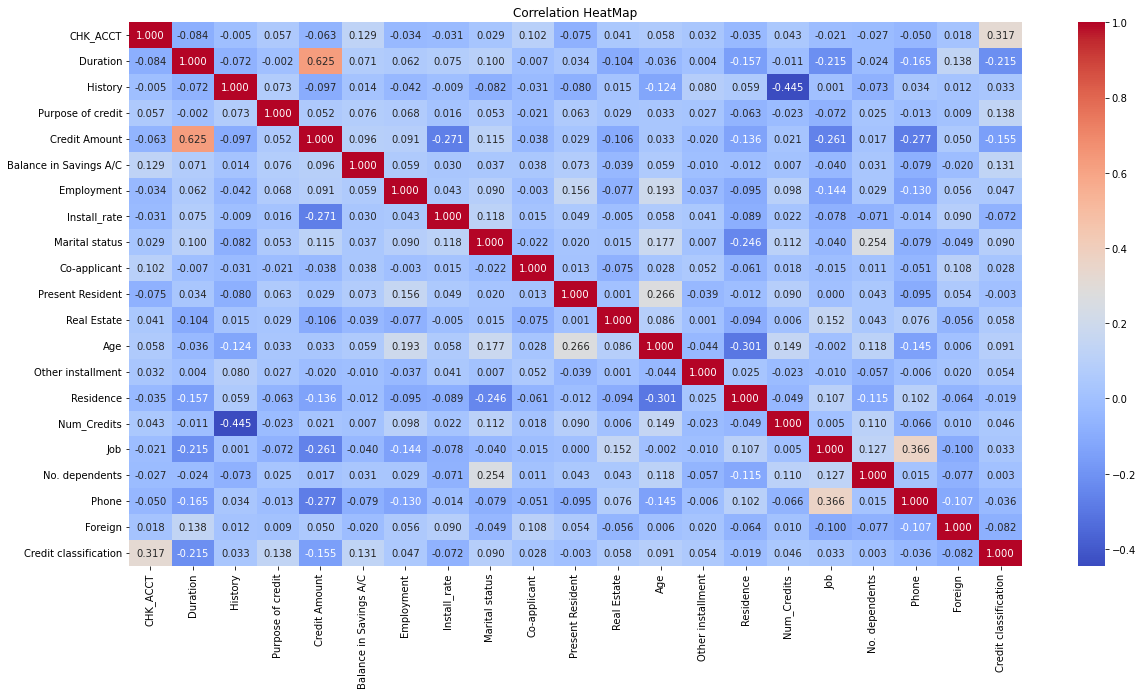

In [6]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize = (20,10))
    sns.heatmap(
    correlation_matrix,
    annot = True,
    cmap = "coolwarm",
    fmt = ".3f",)
    
    plt.title("Correlation HeatMap")

show_heat_map(df)

In [7]:
necessary_columns = []

matrix = df.corr().to_dict()
for i, j in matrix.items():
    if i == 'Credit classification':
        for j, k in matrix[i].items():
            if abs(k) > 0.03:
                necessary_columns.append(j)

necessary_columns.remove('Credit classification')
print(necessary_columns)

['CHK_ACCT', 'Duration', 'History', 'Purpose of credit', 'Credit Amount', 'Balance in Savings A/C', 'Employment', 'Install_rate', 'Marital status', 'Real Estate', 'Age', 'Other installment', 'Num_Credits', 'Job', 'Phone', 'Foreign']


In [8]:
X = df[necessary_columns]
y = df['Credit classification']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [11]:
random = 52

classifier = MLPClassifier(random_state = random)

metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [12]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 1)
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
    
metrics['Accuracy'].append(accuracy)
metrics['Precision'].append(precision)
metrics['Recall'].append(recall)
metrics['F1 Score'].append(f1)

In [13]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.705
Precision: 0.792025
Recall: 0.705
F1 Score: 0.5830205278592375


In [14]:
# The model is saved so that it can be used when user submits the form and prediction is done through API

import pickle
pickle_out = open("classifier.sav", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [15]:
with open("classifier.sav", "rb") as pickle_file:
    # Load the object from the file
    loaded_classifier = pickle.load(pickle_file)